In [1]:
import numpy as np

In [2]:
class LogisticRegression:
    
    def fit(self, X, y, lr = 0.001, epochs=10000, verbose=True, batch_size=1):
        self.classes = np.unique(y)
        y = (y==self.classes[1]) * 1
        X = self.add_bias(X)
        self.weights = np.zeros(X.shape[1])
        self.loss = []
        for i in range(epochs):
            self.loss.append(self.cross_entropy(X,y))
            if i % 1000 == 0 and verbose: 
                print('Iterations: %d - Error : %.4f' %(i, self.loss[i]))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch =  X[idx], y[idx]
            self.weights -= lr * self.get_gradient(X_batch, y_batch)
        return self

    #Defining the gradient descent predicting value
    def get_gradient(self, X, y):
        return -1.0 * (y - self.predict_(X)).dot(X) / len(X)
    
    #predicting the predicting variable
    def predict_(self, X):
        return self.sigmoid(np.dot(X, self.weights))
    
    #predicting the predicting variable
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    #Defining the sigmoid function
    def sigmoid(self, z):
        return 1.0/(1 + np.exp(-z))
    
    #Defing th enumber of classes required for prediction
    def predict_classes(self, X):
        return self.predict_classes_(self.add_bias(X))

    #Defing th enumber of classes required for prediction
    def predict_classes_(self, X):
        return np.vectorize(lambda c: self.classes[1] if c>=0.5 else self.classes[0])(self.predict_(X))
    
    #cross entropy
    def cross_entropy(self, X, y):
        p = self.predict_(X)
        return (-1 / len(y)) * (y * np.log(p)).sum()

    #adding biasing
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)

    def score(self, X, y):
        return self.cross_entropy(self.add_bias(X), y)

In [3]:
from sklearn.metrics import accuracy_score
def train_model(X, y, model):
    model.fit(X, y, lr=0.1)
    pre = model.predict_classes(X)
    print('Accuracy :: ', accuracy_score(y, pre))

In [4]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
lr = LogisticRegression()
train_model(X,(y !=0 )*1, lr)

Iterations: 0 - Error : 0.4621
Iterations: 1000 - Error : 0.0038
Iterations: 2000 - Error : 0.0014
Iterations: 3000 - Error : 0.0016
Iterations: 4000 - Error : 0.0008
Iterations: 5000 - Error : 0.0005
Iterations: 6000 - Error : 0.0006
Iterations: 7000 - Error : 0.0005
Iterations: 8000 - Error : 0.0004
Iterations: 9000 - Error : 0.0005
Accuracy ::  1.0


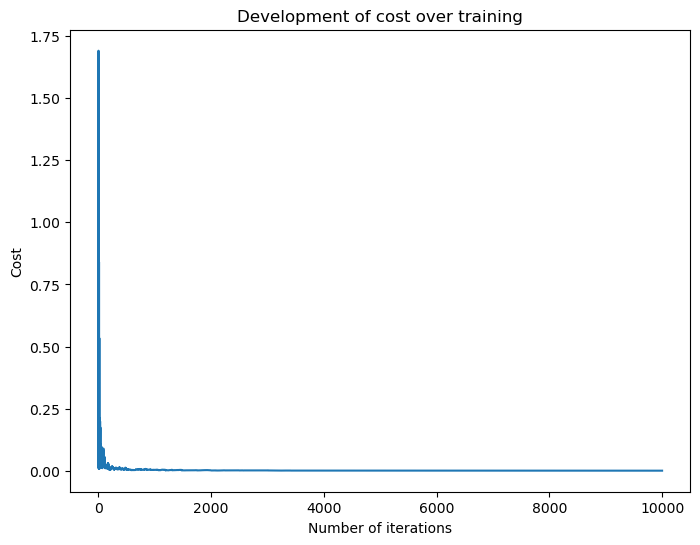

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()